In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from vinzy_imgdata_importer import img_data_importer 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D,Conv2D,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16

In [3]:
x_path = r'Labelled_Data/X_categories.pickle'
y_path = r'Labelled_Data/y_labels.pickle'

In [4]:
with open(x_path,'rb') as file:
    X_data = pickle.load(file)

with open(y_path,'rb') as file:
    Y_data = pickle.load(file)

<Axes: xlabel='count'>

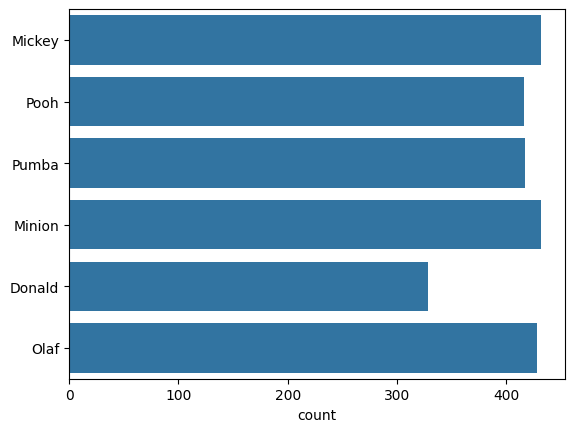

In [5]:
mappings = {0:'Donald',1:'Mickey',2:'Minion',3:'Olaf',4:'Pooh',5:'Pumba'}
Y_data_count = pd.Series(Y_data)
img_count = Y_data_count.map(mappings)
sns.countplot(img_count)

In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
X_data[0].shape

(224, 224, 3)

In [8]:
X_data.shape[0]

2453

In [9]:
X_train = X_data.reshape(X_data.shape[0],224,224,3)

In [10]:
Y_train = to_categorical(Y_data,num_classes=6)

In [11]:
vgg_base = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in vgg_base.layers:
    layer.iterable = False

cnn = Sequential([Conv2D(50,(2,2),activation='relu'),
                  Flatten(),
                  Dense(20,activation='relu',kernel_regularizer=l2(0.01)),
                  Dense(6,activation='softmax')])

In [12]:
cnn.compile(optimizer=Adam(learning_rate=), 
            loss="categorical_crossentropy", 
            metrics=['accuracy','precision', 'recall',])

In [13]:
cnn.fit(datagen.flow(X_train, Y_train,batch_size=32))

c:\Users\Brijesh AH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.2113 - loss: 9373.6074 - precision: 0.2158 - recall: 0.2052


In [16]:
a = X_data[1].reshape(1,224,224,3)
prediction = cnn.predict(a)
mappings[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


'Pumba'

In [17]:
plt.imshow(X_data[1])
plt.title(labels[Y_data[1]])
plt.axis('off')

NameError: name 'labels' is not defined

Error in callback <function _draw_all_if_interactive at 0x000001F6E2C889A0> (for post_execute), with arguments args (),kwargs {}:


ValueError: arrays must be of dtype byte, short, float32 or float64

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

In [29]:
cnn.save('model.keras')

In [17]:
import re

sentence = "Hello!!!, Hi there!!"
sen = ' '.join(re.sub(r'[^a-zA-Z\s]',' ',sentence).split())
sen

'Hello Hi there'